# Trigrams from scratch


#### This notebook is a slight modification from that of Bigrams.


#### We first read a file that contains a bunch of names.


In [1]:
words = open("names.txt", "r").read().splitlines()


#### There are 32033 names.


In [2]:
len(words)


32033

#### Here are some examples.


In [3]:
words[:5]


['emma', 'olivia', 'ava', 'isabella', 'sophia']

#### In Trigrams, we use two characters to predict the next one.

#### Let's see how many combinations (charactor-charactor pair) are there.


In [4]:
b = {}
formers = set()
nexts = set()
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        former = ch1 + ch2
        next = ch3
        formers.add(former)
        nexts.add(next)
        bigram = (former, next)
        b[bigram] = b.get(bigram, 0) + 1


#### The mapping looks like this.


In [5]:
b


{('.e', 'm'): 288,
 ('em', 'm'): 100,
 ('mm', 'a'): 72,
 ('ma', '.'): 174,
 ('.o', 'l'): 104,
 ('ol', 'i'): 69,
 ('li', 'v'): 54,
 ('iv', 'i'): 78,
 ('vi', 'a'): 147,
 ('ia', '.'): 903,
 ('.a', 'v'): 243,
 ('av', 'a'): 161,
 ('va', '.'): 93,
 ('.i', 's'): 124,
 ('is', 'a'): 142,
 ('sa', 'b'): 76,
 ('ab', 'e'): 173,
 ('be', 'l'): 201,
 ('el', 'l'): 822,
 ('ll', 'a'): 337,
 ('la', '.'): 684,
 ('.s', 'o'): 152,
 ('so', 'p'): 21,
 ('op', 'h'): 37,
 ('ph', 'i'): 61,
 ('hi', 'a'): 81,
 ('.c', 'h'): 352,
 ('ch', 'a'): 236,
 ('ha', 'r'): 329,
 ('ar', 'l'): 287,
 ('rl', 'o'): 44,
 ('lo', 't'): 14,
 ('ot', 't'): 34,
 ('tt', 'e'): 121,
 ('te', '.'): 175,
 ('.m', 'i'): 393,
 ('mi', 'a'): 95,
 ('.a', 'm'): 384,
 ('am', 'e'): 226,
 ('me', 'l'): 188,
 ('el', 'i'): 537,
 ('li', 'a'): 518,
 ('.h', 'a'): 505,
 ('ar', 'p'): 8,
 ('rp', 'e'): 5,
 ('pe', 'r'): 77,
 ('er', '.'): 683,
 ('.e', 'v'): 154,
 ('ev', 'e'): 142,
 ('ve', 'l'): 76,
 ('el', 'y'): 353,
 ('ly', 'n'): 976,
 ('yn', '.'): 953,
 ('.a', 'b'):

#### Sorting by frequency, we see top 10 most frequent pairs (of characters).


In [6]:
sorted(b.items(), key=lambda kv: -kv[1])[:10]


[(('ah', '.'), 1714),
 (('na', '.'), 1673),
 (('an', '.'), 1509),
 (('on', '.'), 1503),
 (('.m', 'a'), 1453),
 (('.j', 'a'), 1255),
 (('.k', 'a'), 1254),
 (('en', '.'), 1217),
 (('ly', 'n'), 976),
 (('yn', '.'), 953)]

In [7]:
len(formers), len(nexts)


(601, 27)

#### In order to work with characters, we need to convert them to some numbers.

#### So let's create encoding / decoding maps.


In [8]:
stoi_f = {s: i for i, s in enumerate(sorted(formers))}
itos_f = {i: s for s, i in stoi_f.items()}

stoi_n = {s: i for i, s in enumerate(sorted(nexts))}
itos_n = {i: s for s, i in stoi_n.items()}


In [9]:
stoi_f


{'.a': 0,
 '.b': 1,
 '.c': 2,
 '.d': 3,
 '.e': 4,
 '.f': 5,
 '.g': 6,
 '.h': 7,
 '.i': 8,
 '.j': 9,
 '.k': 10,
 '.l': 11,
 '.m': 12,
 '.n': 13,
 '.o': 14,
 '.p': 15,
 '.q': 16,
 '.r': 17,
 '.s': 18,
 '.t': 19,
 '.u': 20,
 '.v': 21,
 '.w': 22,
 '.x': 23,
 '.y': 24,
 '.z': 25,
 'aa': 26,
 'ab': 27,
 'ac': 28,
 'ad': 29,
 'ae': 30,
 'af': 31,
 'ag': 32,
 'ah': 33,
 'ai': 34,
 'aj': 35,
 'ak': 36,
 'al': 37,
 'am': 38,
 'an': 39,
 'ao': 40,
 'ap': 41,
 'aq': 42,
 'ar': 43,
 'as': 44,
 'at': 45,
 'au': 46,
 'av': 47,
 'aw': 48,
 'ax': 49,
 'ay': 50,
 'az': 51,
 'ba': 52,
 'bb': 53,
 'bc': 54,
 'bd': 55,
 'be': 56,
 'bh': 57,
 'bi': 58,
 'bj': 59,
 'bl': 60,
 'bn': 61,
 'bo': 62,
 'br': 63,
 'bs': 64,
 'bt': 65,
 'bu': 66,
 'by': 67,
 'ca': 68,
 'cc': 69,
 'cd': 70,
 'ce': 71,
 'cg': 72,
 'ch': 73,
 'ci': 74,
 'cj': 75,
 'ck': 76,
 'cl': 77,
 'co': 78,
 'cp': 79,
 'cq': 80,
 'cr': 81,
 'cs': 82,
 'ct': 83,
 'cu': 84,
 'cx': 85,
 'cy': 86,
 'cz': 87,
 'da': 88,
 'db': 89,
 'dc': 90,
 'dd': 91

In [10]:
stoi_n


{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [11]:
n_formers, n_nexts = len(formers), len(nexts)
n_formers, n_nexts


(601, 27)

#### Now, we are going to visualize the frequency of bigrams


#### First, prepare a 27-by-27 table. Each cell indicates each character-character pair.


In [12]:
import torch

N = torch.zeros((n_formers, n_nexts), dtype=torch.int32)
for (ch1, ch2), freq in b.items():
    N[stoi_f[ch1], stoi_n[ch2]] = freq


#### Here is the table.


In [13]:
N


tensor([[  0, 207, 190,  ...,  27, 173, 152],
        [  0, 169,   0,  ...,   0,   4,   0],
        [  0, 628,   0,  ...,   0,  46,   2],
        ...,
        [  1,   0,   0,  ...,   0,   0,   0],
        [ 34,  27,   0,  ...,   0,   0,   1],
        [  4,  13,   0,  ...,   0,   7,   0]], dtype=torch.int32)

#### Let's visualize the table by colors.


#### For example, "kar" ("ka" followed by "r") is pretty popular choice (in terms of frequency)


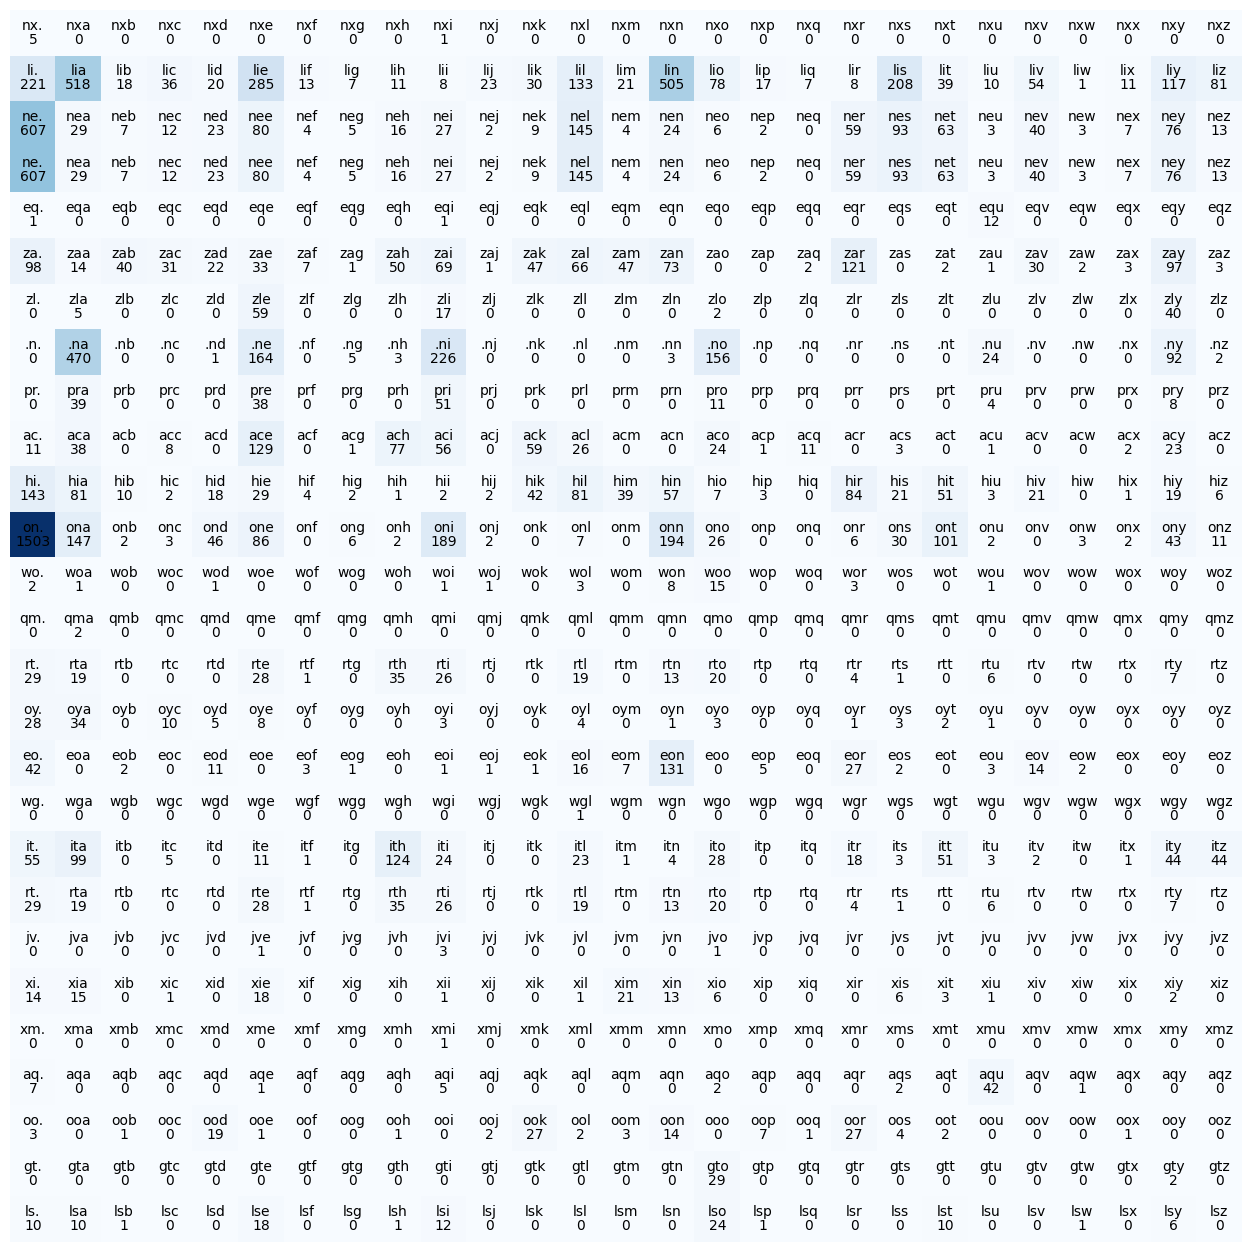

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
index_sample = n_nexts
g = torch.Generator().manual_seed(42)
index = torch.randint(0, n_formers, (index_sample,), generator = g)
plt.imshow(N[index, :], cmap='Blues')
for ix, i in enumerate(index):
    for j in range(n_nexts):
        chstr = itos_f[i.item()] + itos_n[j]
        plt.text(j, ix, chstr, ha="center", va="bottom", color='k')
        plt.text(j, ix, N[i, j].item(), ha="center", va="top", color='k')
plt.axis('off');

#### Now, we would like to convert the frequency into likelihood (probability), by normalizing it.


In [15]:
P = N.float()
P /= P.sum(1, keepdim=True)  # keepdim=True is necessary for proper normalization.


#### The likelihood (probability) table looks like this.

#### Since there are too many rows, we just show only some selected rows.

#### For example, "lia" has 76\%. This means that if the previous two characters are "li", then the next character is highly likely to be "a".


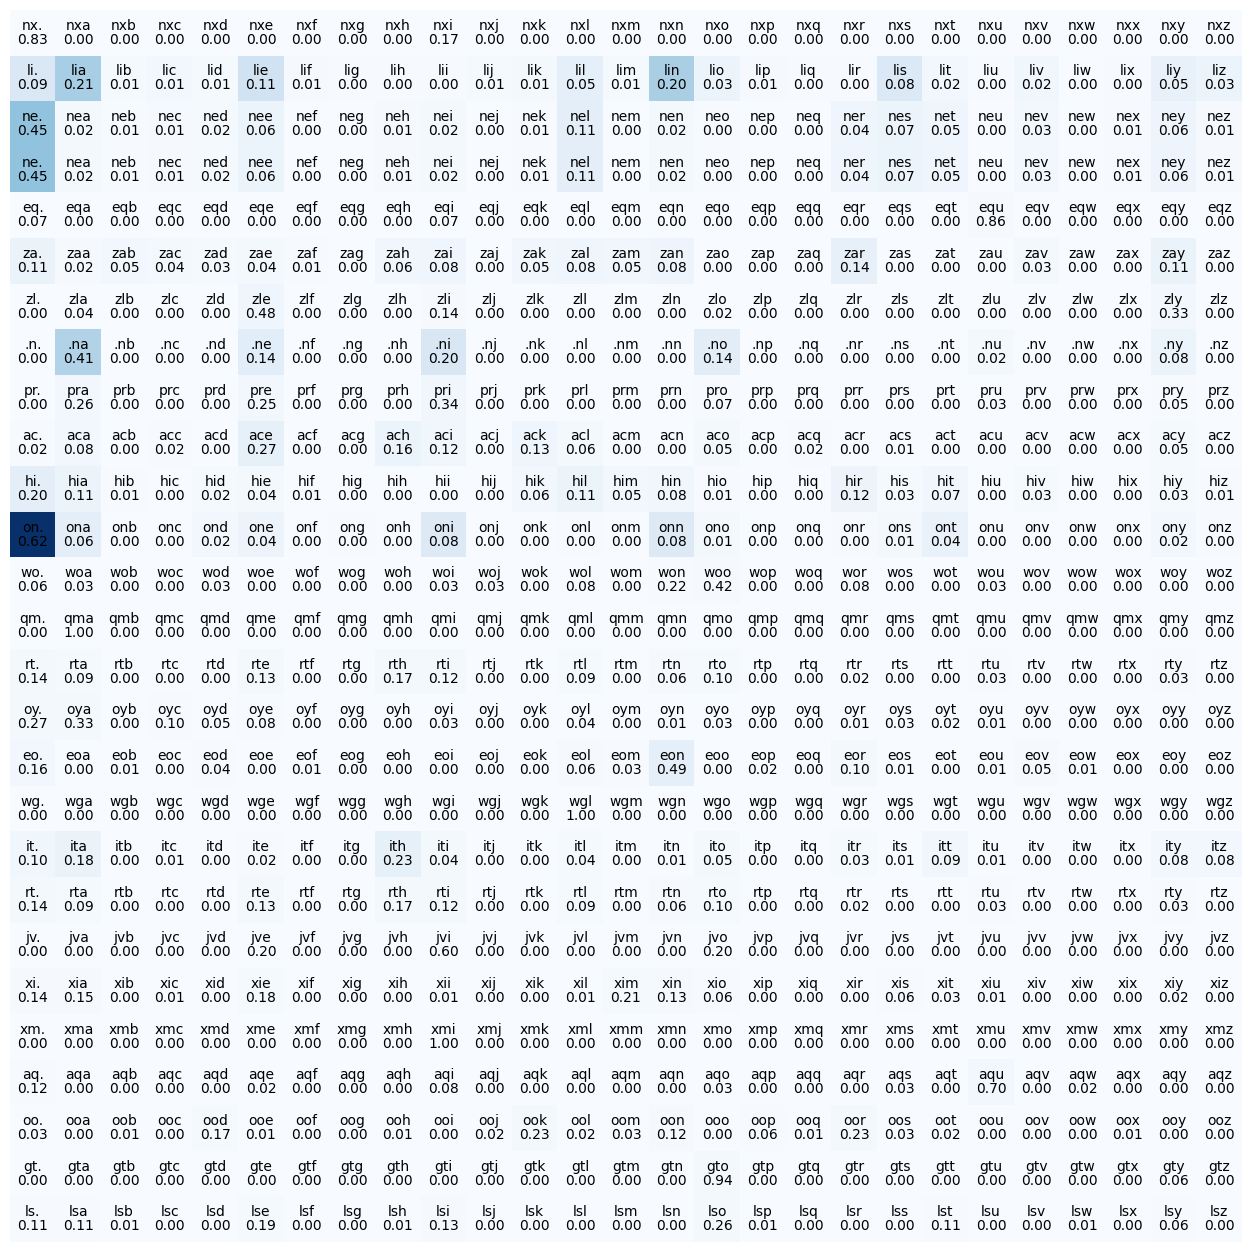

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
index_sample = n_nexts
g = torch.Generator().manual_seed(42)
index = torch.randint(0, n_formers, (index_sample,), generator = g)
plt.imshow(N[index, :], cmap='Blues')
for ix, i in enumerate(index):
    for j in range(n_nexts):
        chstr = itos_f[i.item()] + itos_n[j]
        plt.text(j, ix, chstr, ha="center", va="bottom", color='k')
        plt.text(j, ix, "%.2f" % (P[i, j].item()), ha="center", va="top", color='k')
plt.axis('off');

#### OK, now we will build a model purely based on this probability table.

#### That is, staring from starting character ("."), we sample characters based on the probability given in the table, until it samples ending character (".").


#### Set a seed for generator.


In [17]:
g = torch.Generator().manual_seed(42)


#### We randomly generate 10 names.


In [18]:
for i in range(10):
    out = []
    ix = torch.randint(
        0, 26, (1,), generator=g
    ).item()  # randomly start from ".a", ".b",..., ".z"
    out = [itos_f[ix][-1]]
    while True:
        p = P[ix]
        tmp = itos_f[ix][-1]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos_n[ix])
        ix = stoi_f[tmp + itos_n[ix]]
    print("".join(out))


se
emahle
emen
webothmang
vya
oryahd
uren
pabellyn
ziah
fah


#### The generated names here are more realistic(?) than those from the bigrams.


#### Finally, we also build a neural machine.


#### As before, split the data


In [19]:
def build_dataset(words):
    xs, ys = [], []
    for w in words:
        chs = ["."] + list(w) + ["."]
        for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
            former = ch1 + ch2
            next = ch3
            ix1 = stoi_f[former]
            ix2 = stoi_n[next]
            xs.append(ix1)
            ys.append(ix2)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    return xs, ys


import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

x_train, y_train = build_dataset(words[:n1])
x_val, y_val = build_dataset(words[n1:n2])
x_test, y_test = build_dataset(words[n2:])


In [20]:
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape), (x_test.shape, y_test.shape)


((torch.Size([156999]), torch.Size([156999])),
 (torch.Size([19452]), torch.Size([19452])),
 (torch.Size([19662]), torch.Size([19662])))

#### We consider a single hidden layer neural network.


#### Here is the workflow for training (no batch here):

- init W (27 \* 27)
- encoding x: one-hot encoding (e.g., n \* 27)
- forward pass
  - logits = xenc @ W (e.g., n \* 27)
  - est_y = softmax (logits)
  - nll(est_y, y)
- backward pass
  - loss.backward()
- update
  - W.data += - lr \* W.grad


#### Init W.


In [21]:
g = torch.Generator().manual_seed(42)
W = torch.randn((n_formers, n_nexts), generator=g, requires_grad=True)


#### Encode X


In [22]:
import torch.nn.functional as F

x_train_enc = F.one_hot(x_train, num_classes=n_formers).float()
x_val_enc = F.one_hot(x_val, num_classes=n_formers).float()
x_test_enc = F.one_hot(x_test, num_classes=n_formers).float()


In [23]:
x_train_enc


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [24]:
x_train_enc.shape


torch.Size([156999, 601])

In [25]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        former = ch1 + ch2
        next = ch3
        ix1 = stoi_f[former]
        ix2 = stoi_n[next]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")


log_likelihood=tensor(-404357.3438)
nll=tensor(404357.3438)
2.061858892440796


#### This implies that the mean negative log likelihood of 2.06 is the loss level that we can target in our training. Let's run training.


#### Run training


In [26]:
def calc_loss(x, y, W):
    logits = x @ W
    counts = logits.exp()
    est_y = counts / counts.sum(1, keepdims=True)
    loss = -est_y[torch.arange(x.shape[0]), y].log().mean()
    return loss


In [27]:
list_loss_train, list_loss_val = [], []
for k in range(500):
    # forward pass
    loss_train = calc_loss(x_train_enc, y_train, W)
    loss_val = calc_loss(x_val_enc, y_val, W)

    if (k + 1) % 10 == 0:
        print(
            f"itr = {k+1}, loss_train={loss_train.item(): .4f}, loss_val={loss_val.item(): .4f}"
        )

    list_loss_train.append(loss_train.item())
    list_loss_val.append(loss_val.item())

    # backward pass
    W.grad = None
    loss_train.backward()

    # update
    W.data += -50.0 * W.grad


itr = 10, loss_train= 3.2137, loss_val= 3.2168
itr = 20, loss_train= 2.9221, loss_val= 2.9220
itr = 30, loss_train= 2.7642, loss_val= 2.7639
itr = 40, loss_train= 2.6625, loss_val= 2.6632
itr = 50, loss_train= 2.5892, loss_val= 2.5910
itr = 60, loss_train= 2.5330, loss_val= 2.5358
itr = 70, loss_train= 2.4884, loss_val= 2.4922
itr = 80, loss_train= 2.4521, loss_val= 2.4568
itr = 90, loss_train= 2.4220, loss_val= 2.4275
itr = 100, loss_train= 2.3966, loss_val= 2.4027
itr = 110, loss_train= 2.3747, loss_val= 2.3814
itr = 120, loss_train= 2.3557, loss_val= 2.3630
itr = 130, loss_train= 2.3391, loss_val= 2.3468
itr = 140, loss_train= 2.3243, loss_val= 2.3324
itr = 150, loss_train= 2.3111, loss_val= 2.3197
itr = 160, loss_train= 2.2993, loss_val= 2.3082
itr = 170, loss_train= 2.2886, loss_val= 2.2978
itr = 180, loss_train= 2.2789, loss_val= 2.2884
itr = 190, loss_train= 2.2700, loss_val= 2.2799
itr = 200, loss_train= 2.2618, loss_val= 2.2721
itr = 210, loss_train= 2.2543, loss_val= 2.2649
i

In [32]:
loss_test = calc_loss(x_test_enc, y_test, W)
print(f"loss_test = {loss_test.item(): .4f}")


loss_test =  2.1734


<Axes: >

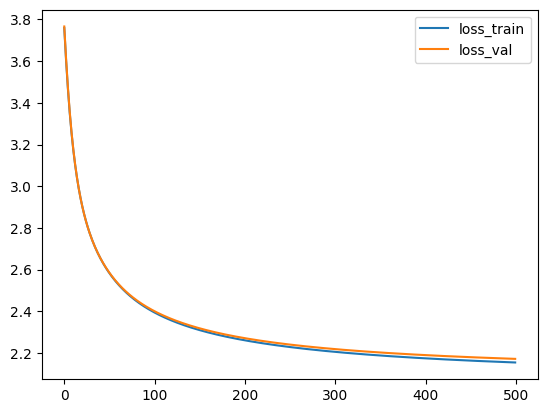

In [28]:
import pandas as pd

pd.DataFrame(
    {"loss_train": list_loss_train, "loss_val": list_loss_val}, index=range(500)
).plot()


In [29]:
loss_test = calc_loss(x_test_enc, y_test, W)
print(f"loss_test = {loss_test.item(): .4f}")


loss_test =  2.1734


#### Looks like it gets pretty enough training. Let's try to generate a few names.


In [30]:
g = torch.Generator().manual_seed(42)
for i in range(10):  # generating 10 names
    out = []
    ix = torch.randint(
        0, n_nexts - 1, (1,), generator=g
    ).item()  # randomly start from ".a", ".b",..., ".z"
    out = [itos_f[ix][-1]]
    while True:
        # p = P[ix]
        xenc = F.one_hot(torch.tensor([ix]), num_classes=n_formers).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        tmp = itos_f[ix][-1]
        while True:
            ix = torch.multinomial(
                p, num_samples=1, replacement=True, generator=g
            ).item()
            new_former = tmp + itos_n[ix]
            if ix == 0 or new_former in formers:
                break
        if ix == 0:
            break
        out.append(itos_n[ix])
        ix = stoi_f[new_former]
    print("".join(out))


se
emahle
em
jlbim
bannya
oryah
niewena
va
fajiah
fakeles


#### Yay. The trigrams perform a bit better (than bigrams).


#### Remarks

- The complexity can be higher for n-grams..
- The matrix (L) is pretty sparse.
